# Implementation of Image Compression with Partitioned IFS

Only implemented with black and white images for simplicity

In [29]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import AffineTransformation as af
import IFS as ifs

In [2]:
#create domain blocks 
#each domain block has 1 ifs
#apply each of the ifss to its domain block

#assume have square domain blocks -> need two points to represent them
#have starting points in each domain block (say corner or smth)
#at each iteration, calculate next point from previous 
#(2d arrays, x[0][0] initial point in 0th domain block, x[0][1] next point in 0th domain block)

#use IFS defined before

In [30]:
class DomainBlock:
    def __init__(self, bot_left, width, height):
        self.bot_left = bot_left
        self.width = width
        self.height = height

class PIFS:
    def __init__(self, name, domain_blocks, ifs_list):
        assert len(domain_blocks) == len(ifs_list)
        
        self.name = name
        self.domain_blocks = domain_blocks
        self.ifs_list = ifs_list

        
    def generate_image(self, n):
        #generates 2d arrays containing x coordinates (resp. y coordinates) for each of the blocks
        x, y = [], []
        
        num_blocks = len(self.domain_blocks)
        block_n = round(n/num_blocks)

        for i in range(num_blocks):
            block_x, block_y = self.ifs_list[i].generate_image(block_n) #total number of points is n * num_blocks

            x.append(block_x)
            y.append(block_y)
        
        return x, y

    def show_image(self, n):
        x, y = self.generate_image(n)
        
        plt.scatter(x, y, s=100/n)
        plt.title(f"{self.name} with {n} points")
        
    def show_image_with_blocks(self, n):
        fig, ax = plt.subplots()
        
        self.show_image(n)
        
        for block in self.domain_blocks:  
            ax.add_patch(Rectangle(block.bot_left, block.width, block.height,
                                   edgecolor = 'black', facecolor = 'none'))
        
        plt.show()
        
        

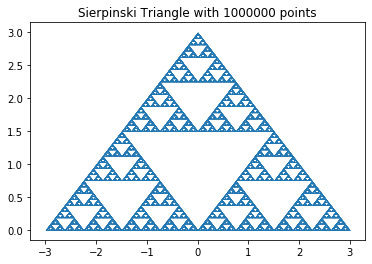

In [31]:
#Sierpinski triangle

#sierpinski transforms for given points
def sierpinski_fns(a, b, c):
    w1 = af.AffineTransformation(1/2, 0, 0, 1/2, a[0]/2, a[1]/2)
    w2 = af.AffineTransformation(1/2, 0, 0, 1/2, b[0]/2, b[1]/2)
    w3 = af.AffineTransformation(1/2, 0, 0, 1/2, c[0]/2, c[1]/2)
    
    return [w1, w2, w3]

#initialisation
probs = [1/3, 1/3, 1/3]
width = 3
height = 1.5

bot_left1 = (-1.5, 1.5)
d1 = DomainBlock(bot_left1, width, height)

fns1 = sierpinski_fns((0, 3), (-1.5, 1.5), (1.5, 1.5))
ifs1 = ifs.IFS("ifs1", fns1, probs, bot_left1)

bot_left2 = (-3, 0)
d2 = DomainBlock(bot_left2, width, height)

fns2 = sierpinski_fns((-1.5, 1.5), (-3, 0), (0, 0))
ifs2 = ifs.IFS("ifs2", fns2, probs, bot_left2)


bot_left3 = (0, 0)
d3 = DomainBlock(bot_left3, width, height)

fns3 = sierpinski_fns((1.5, 1.5), (0, 0), (3, 0))
ifs3 = ifs.IFS("ifs3", fns3, probs, bot_left3)

#creation of pifs
domain_blocks = [d1, d2, d3]
ifs_list = [ifs1, ifs2, ifs3]

pifs = PIFS("Sierpinski Triangle", domain_blocks, ifs_list)

#showing attractor
n = 1000000
pifs.show_image(n)


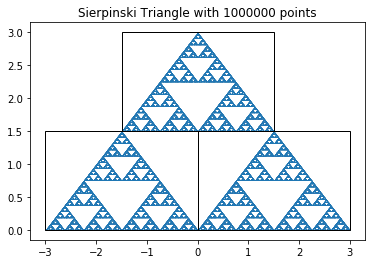

In [34]:
pifs.show_image_with_blocks(n)

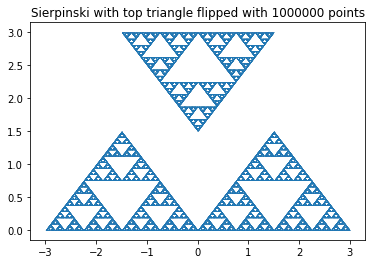

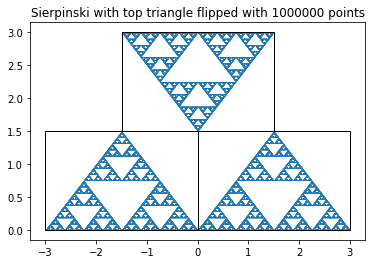

In [33]:
#sierpinski triangle with top triangle flipped (to show domain blocks are independent)
fns1_alt = sierpinski_fns((0, 1.5), (-1.5, 3), (1.5, 3))
ifs1_alt = ifs.IFS("ifs1_alt", fns1_alt, probs, (0, 1.5))

domain_blocks = [d1, d2, d3]
ifs_list_alt = [ifs1_alt, ifs2, ifs3]

pifs_alt = PIFS("Sierpinski with top triangle flipped", domain_blocks, ifs_list_alt)

#show attractor
n = 1000000
pifs_alt.show_image(n)
pifs_alt.show_image_with_blocks(n)

In [ ]:
fns1_alt2 = sierpinski_fns((0,0), (-1.5, 1.5), (1.5, 1.5))
ifs_alt2 = ifs.IFS("")